# Predicting and Visualizing Solar Irradiance Levels from Historical Weather


## Project Background & Motivation
___

Research and development of renewable energy sources has increased dramatically during the past twenty years. Of the various sources of renewable energy, solar power has become one of the most prominent. There are many advantages that come with using solar power, including evironmental and economic benefits. Having less of a reliance on oil will not only reduce your carbon footprint, but it will also give you immunity to some uncontrollable factors such as oil prices and reliance on external sources. With that being said, the amount of solar energy being provided per day is an essential factor to the success of solar panels. Users of solar panels must take several factors into consideration, such as location, time, and weather patterns, in order to know how much electricity will be produced by the solar panels on a given day.

## Problem Statement/Statement of Work
___

The amount of energy provided by the sun on a given day is unctrollable. It cannot be increased or decreased to a users liking, but it can be predicted and planned for. In this project, historical weather forecasts and solar irradiance data will be used to predict and visualize the differences in solar irradiance and weather patterns for seven prominent United States locations. These include: Chicago, Denver, Los Angeles, Miami, Newark, San Antonio, and Seattle. For each city, daily data over a five year span was collected for analysis. As these cities all have fairly distinctive climates, the goal of this project will be to analyze the performance of solar panels in each city and use time series models to predict future solar irradiance levels based on expected weather patterns.  

## Exploratory Data Analysis
___

 __Data Dictionary__

| Variable                | Description                                                                                                                                               |
|-------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Location                | City in which the data was recorded                                                                                                            |
| Date                    | Date on which the data was recorded                                                                                                   |
| Zenith_Angle            | Hourly mean solar zenith angle (angle between the sun and the zenith)                                                                                                            |
| Azimuth_Angle           | Hourly mean solar azimuth angle (angle between sun and north)                                                                                                  |
| ETR                     | Hourly mean solar radiation received on a horizontal surface at the top of the atmosphere                                                                                                         |
| ETRN                    | Hourly mean solar radiation received on a surface normal to the sun at the top of the atmosphere                                                                                                   |
| SUNY_Glo                | Total hourly average amount of direct and diffuse solar radiation received on a horizontal surface 
|
| SUNY_Dir                | Hourly mean solar radiation received in a collimated beam on a surface normal to the sun                                                                            |
| Wind_Speed              | Average daily wind speed (tenths of meters per second)                                                              |
| Precipitation           | Amount of precipitation (tenths of mm)                                                    |
| Snow                    | Snowfall (mm)                                                                                                                             |
| Avg_Temp                | Average temperature                                                                                                    |
| Max_Temp                | Maximum temperature                                                                                                                           |
| Min_Temp                | Minimum temperature                                                                                                                               |
| WDF2                    | Direction of fastest 2-minute wind (degrees)                                                                          |
| WSF2                    | Fastest 2-minute wind speed (tenths of meters per second)                                                                                                                                      |
| WT01                    | Fog, ice fog, or freezing fog                                                                                           |
| WT02                    | Heavy fog or heavy freezing fog                                                                                                                
|
| WT03                    | Thunder                                                                                                                                     |
| WT04                    | Ice pellets, sleet, snow pellets, or small hail                                                                                                                          |
| WT05                    | Hail                                                                                                                               |
| WT06                    | Glaze or rime                                                                            |
| WT07                    | Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction                                                                                                                                       |
| WT08                    | Smoke or haze                                                                                          |
| WT09                    | Blowing or drifting snow                                                                                                   |
| WT10                    | Tornado, waterspout, or funnel cloud                                                                                                                           |
| WT11                    | High or damaging winds                                                                                                                               |
| WT13                    | Mist                                                                                     |
| WT14                    | Drizzle                                                                                                                                       |
| WT15                    | Freezing drizzle                                                                                          |
| WT16                    | Rain                                                                                                                                       |
| WT17                    | Freezing rain                                                                                          |
| WT18                    | Snow, snow pellets, snow grains, or ice crystals                                                                                                    |
| WT19                    | Unknown source of precipitation                                                                                                                           |
| WT21                    | Ground fog                                                                                                                               |
| WT22                    | Ice fog or freezing fog                                                                           |


<b> Import Modules </b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np

<b> Read csv file to a pandas dataframe </b>

In [2]:
df = pd.read_csv("solar.csv")

<b> Number of rows, number of columns in dataset </b>

In [3]:
print('There are # number of rows in the dataset    :', df.shape[0])
print('There are # number of columns in the dataset :', df.shape[1])

There are # number of rows in the dataset    : 12782
There are # number of columns in the dataset : 36


<b> Features datatypes and non-null </b>

In [4]:
df.info()
# convert table to markdown, source: https://tableconvert.com/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 36 columns):
Location         12782 non-null object
Date             12782 non-null object
Zenith_Angle     12782 non-null float64
Azimuth_Angle    12782 non-null float64
ETR              12782 non-null int64
ETRN             12782 non-null int64
SUNY_Glo         12782 non-null int64
SUNY_Dir         12782 non-null int64
Wind_Speed       12782 non-null float64
Precipitation    12782 non-null float64
Snow             12782 non-null float64
Avg_Temp         12782 non-null int64
Max_Temp         12782 non-null int64
Min_Temp         12782 non-null int64
WDF2             12782 non-null int64
WSF2             12782 non-null float64
WT01             12782 non-null bool
WT02             12782 non-null bool
WT03             12782 non-null bool
WT04             12782 non-null bool
WT05             12782 non-null bool
WT06             12782 non-null bool
WT07             12782 non-null bool
WT08      

<b> Show first 5 rows of the dataset </b>

In [5]:
df.head()

,Location,Date,Zenith_Angle,Azimuth_Angle,ETR,ETRN,SUNY_Glo,SUNY_Dir,Wind_Speed,Precipitation,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,CHICAGO,2005-01-01,75.18,180.88,354,1292,109,103,10.51,0.31,...,False,True,False,False,True,False,False,False,False,False
1,CHICAGO,2005-01-02,75.11,180.79,355,1295,82,11,8.28,0.08,...,False,True,False,False,True,False,False,False,False,False
2,CHICAGO,2005-01-03,75.02,180.71,357,1297,44,0,11.41,0.36,...,False,True,True,False,True,False,False,True,False,False
3,CHICAGO,2005-01-04,74.94,180.63,359,1299,158,183,11.63,0.05,...,False,True,True,False,True,False,True,False,False,False
4,CHICAGO,2005-01-05,74.85,180.55,361,1302,73,48,18.34,0.38,...,False,True,False,False,False,False,True,False,False,True


In [6]:
df.tail()

,Location,Date,Zenith_Angle,Azimuth_Angle,ETR,ETRN,SUNY_Glo,SUNY_Dir,Wind_Speed,Precipitation,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
12777,SEATTLE,2009-12-27,79.49,177.94,254,1189,158,403,1.34,0.00,...,False,True,False,False,False,False,False,False,False,False
12778,SEATTLE,2009-12-28,79.45,177.86,255,1191,135,306,3.80,0.00,...,False,False,False,False,True,False,False,False,False,False
12779,SEATTLE,2009-12-29,79.39,177.77,256,1193,73,54,4.03,0.06,...,False,False,False,False,True,False,False,False,False,False
12780,SEATTLE,2009-12-30,79.36,177.65,257,1196,63,44,10.29,0.02,...,False,False,False,False,True,False,False,False,False,False
12781,SEATTLE,2009-12-31,79.30,177.57,259,1198,35,0,5.82,0.27,...,False,True,False,False,True,False,False,False,False,False


<b> Descriptive Statistics </b>

In [7]:
df.describe().round(2)

,Zenith_Angle,Azimuth_Angle,ETR,ETRN,SUNY_Glo,SUNY_Dir,Wind_Speed,Precipitation,Snow,Avg_Temp,Max_Temp,Min_Temp,WDF2,WSF2
count,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00,12782.00
mean,58.87,174.68,655.30,1300.53,351.01,354.00,8.63,0.09,0.05,60.34,69.18,51.00,187.59,19.14
std,10.30,5.39,175.37,41.07,159.29,222.96,3.31,0.31,0.45,17.36,18.12,17.58,99.03,6.12
min,44.20,160.03,251.00,1182.00,28.00,0.00,0.00,0.00,0.00,-9.00,-1.00,-19.00,0.00,0.00
25%,48.62,171.65,513.00,1271.00,229.00,156.00,6.26,0.00,0.00,49.00,57.00,39.00,110.00,15.00
50%,58.66,174.78,681.00,1311.00,355.00,375.00,8.05,0.00,0.00,63.00,72.00,53.00,200.00,17.90
75%,67.75,178.66,826.00,1328.00,482.00,541.00,10.51,0.02,0.00,74.00,83.00,64.00,270.00,21.90
max,79.61,185.68,878.00,1410.00,684.00,859.00,30.42,6.64,18.80,92.00,105.00,83.00,360.00,68.90


In [8]:
df.nunique()

Location            7
Date             1826
Zenith_Angle     3235
Azimuth_Angle    2239
ETR               628
ETRN              225
SUNY_Glo          652
SUNY_Dir          837
Wind_Speed        109
Precipitation     235
Snow               66
Avg_Temp           98
Max_Temp          104
Min_Temp           98
WDF2               37
WSF2               46
WT01                2
WT02                2
WT03                2
WT04                2
WT05                2
WT06                2
WT07                2
WT08                2
WT09                2
WT10                2
WT11                2
WT13                2
WT14                2
WT15                2
WT16                2
WT17                2
WT18                2
WT19                2
WT21                2
WT22                2
dtype: int64

In [9]:
# check for null values
df.isnull().sum()

Location         0
Date             0
Zenith_Angle     0
Azimuth_Angle    0
ETR              0
ETRN             0
SUNY_Glo         0
SUNY_Dir         0
Wind_Speed       0
Precipitation    0
Snow             0
Avg_Temp         0
Max_Temp         0
Min_Temp         0
WDF2             0
WSF2             0
WT01             0
WT02             0
WT03             0
WT04             0
WT05             0
WT06             0
WT07             0
WT08             0
WT09             0
WT10             0
WT11             0
WT13             0
WT14             0
WT15             0
WT16             0
WT17             0
WT18             0
WT19             0
WT21             0
WT22             0
dtype: int64

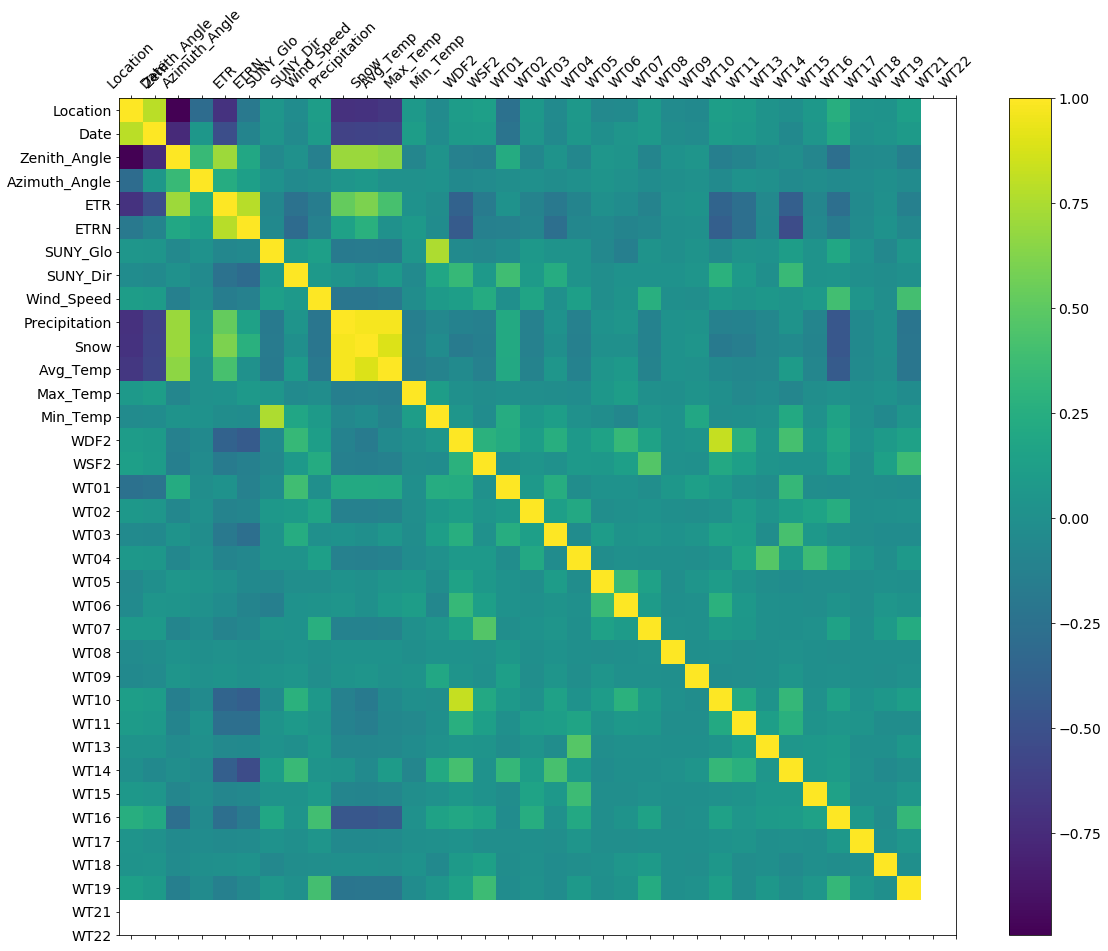

In [11]:
# source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);

In [ ]:
# Findings
# ETR has strong correlation with Snow, Avg Temp, Max Temp. Little correlation with WSF2,
#WT15 and WT11

<function matplotlib.pyplot.show(*args, **kw)>

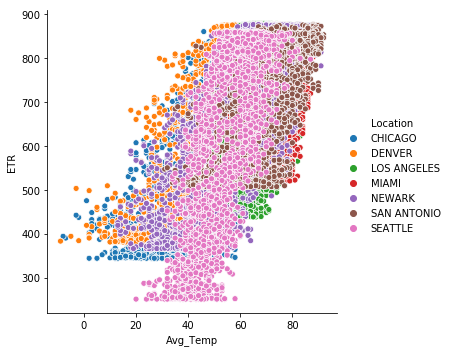

<Figure size 3600x3600 with 0 Axes>

In [12]:
sns.relplot(x='Avg_Temp', y='ETR', hue='Location', data=df)
plt.figure(figsize=(50,50))
plt.show  

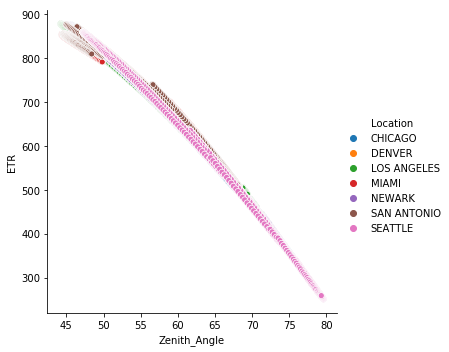

In [16]:
sns.relplot(x='Zenith_Angle', y='ETR', hue='Location', data=df)

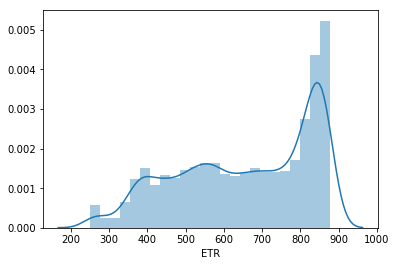

In [13]:
sns.distplot(df['ETR'])

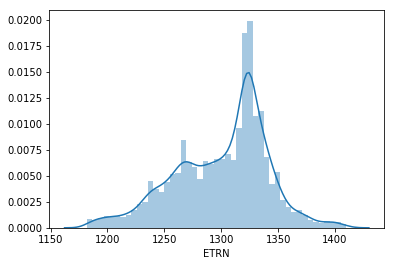

In [37]:
sns.distplot(df['ETRN'])

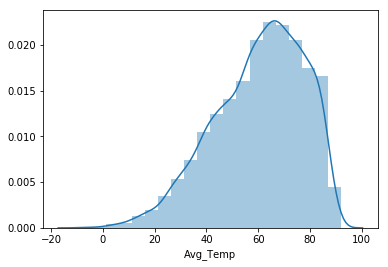

In [35]:
sns.distplot(df['Avg_Temp'], bins=20)

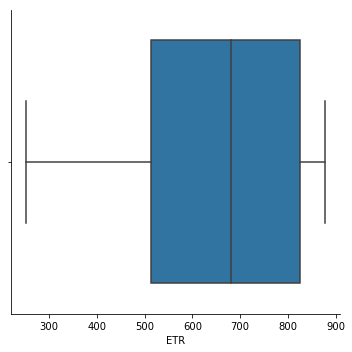

In [38]:
sns.catplot(x='ETR', kind='box', data=df)

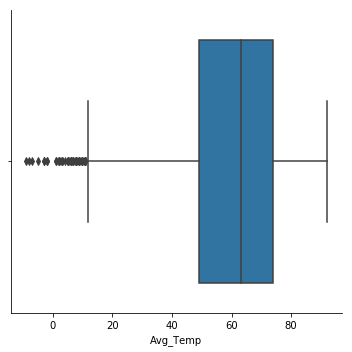

In [39]:
sns.catplot(x='Avg_Temp', kind='box', data=df)